# KNN sur l'ensemble de la donnée

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import matplotlib.pyplot as plt
sns.set()

C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\hp\.conda\envs\AI\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('train.csv')
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch']]  #sélectionne les labels souhaités
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [3]:
data.replace('',np.nan, inplace=True)
data.dropna(axis=0, inplace=True)   #supprime les NaN
data['Sex'].replace(['male','female'], [0,1], inplace=True)  #remplace male/female par 0/1
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [4]:
x = data.drop('Survived', axis=1)  #élimine Survived de x
y = data[['Survived']]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)  #sépare le jeu de données en une partie test (20%) et une partie train (80%)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train.values.ravel())  #entraine le modèle KNN

KNeighborsClassifier(n_neighbors=6)

In [7]:
ypred = model.predict(x_test)  #prédit sur les données de test
ypred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred, y_test)   #score sur les prédictions faites et les résultats attendus

0.7412587412587412

In [9]:
#recherche du meilleur k pour ce modèle KNN
error_tab = []

for k in range(1, 10):  #test pour k allant de 1 à 10
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train.values.ravel())
    ypred_k = model.predict(x_test)
    
    error = 1 - accuracy_score(y_test,ypred_k)
    error_tab.append(error)

0.21678321678321677
1


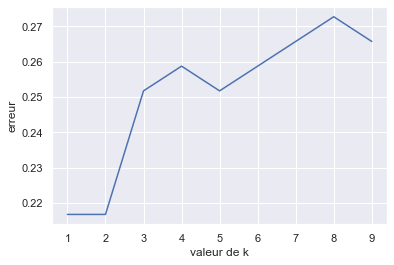

In [10]:
#affichage des résultats du meilleur k
import matplotlib.pyplot as plt
plt.plot(range(1,10),error_tab)
plt.xlabel('valeur de k')
plt.ylabel('erreur')

print(min(error_tab))
print(error_tab.index(min(error_tab))+1)

# Prédiction ligne par ligne du dataset

In [87]:
from csv import writer, reader
def classification(index,data):
    pred_val = model.predict(data)  #prédit sur les lignes des données de test.csv
    
    #with open('gender_submission_test.csv','r') as file:
        #csv_reader = reader(file)
        #header = next(csv_reader)
        #if header != None:
            #for row in csv_reader:
                #if index == list(row[0]) : 
                    #with open('gender_submission_test.csv','a',newline='') as file:
                        #csv_writer = writer(file, delimiter=',',lineterminator='\r\n')
                        #input = index,pred_val
                        #writer.writerow(input)
    with open('gender_submission_test.csv','a', newline='') as file:  #écrit le PassengerId et 
        csv_writer = writer(file, delimiter=',',lineterminator='\r\n') 
        #header = ['PassengerId','Survived']
        input = index,pred_val
        #csv_writer.writerow(header)
        csv_writer.writerow(input)
        file.close()
            
    print(pred_val)

In [88]:
from csv import reader
with open('gender_submission_test.csv','a', newline='') as file:
    csv_writer = writer(file, delimiter=',') 
    header = ['PassengerId','Survived']
    csv_writer.writerow(header)
    
with open('test.csv','r') as file:  
    csv_reader = reader(file)
    header = next(csv_reader)
    if header != None:  #ignore la 1e ligne de header
        for row in csv_reader:
            index = list(row[0])
            index = "".join(index)  #transforme la liste en chaine de charactères
            
            val = pd.DataFrame(row[i] for i in [1,3,4,5,6]).T   #sélectionne les labels souhaités, transforme en dataframe transposé
            val.replace(['male','female'], [0,1], inplace=True)
            
            val.replace('',np.nan, inplace=True)  #remplace les valeurs manquantes par des NaN
            testna = val.isnull().values.any()  #test si il y a présence de NaN
            if testna == True :  
                val.dropna(axis=0, how ='any')   #supprime la ligne contenant un NaN
            
            else: 
                val = val.astype(float)   
                print("Passenger Id:",index)
                classification(index,val)  #prédit Survived sur la ligne

Passenger Id: 892
[0]
Passenger Id: 893
[0]
Passenger Id: 894
[0]
Passenger Id: 895
[0]
Passenger Id: 896
[1]
Passenger Id: 897
[1]
Passenger Id: 898
[0]
Passenger Id: 899
[0]
Passenger Id: 900
[0]
Passenger Id: 901
[0]
Passenger Id: 903
[0]
Passenger Id: 904
[1]
Passenger Id: 905
[0]
Passenger Id: 906
[0]
Passenger Id: 907
[1]
Passenger Id: 908
[0]
Passenger Id: 909
[0]
Passenger Id: 910
[0]
Passenger Id: 911
[0]
Passenger Id: 912
[0]
Passenger Id: 913
[1]
Passenger Id: 915
[1]
Passenger Id: 916
[1]
Passenger Id: 917
[0]
Passenger Id: 918
[1]
Passenger Id: 919
[0]
Passenger Id: 920


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[1]
Passenger Id: 922
[1]
Passenger Id: 923
[0]
Passenger Id: 924
[1]
Passenger Id: 926
[0]
Passenger Id: 927
[0]
Passenger Id: 929
[0]
Passenger Id: 930
[0]
Passenger Id: 932
[0]
Passenger Id: 934
[0]
Passenger Id: 935
[1]
Passenger Id: 936
[0]
Passenger Id: 937
[0]
Passenger Id: 938
[0]
Passenger Id: 940
[1]
Passenger Id: 941
[1]
Passenger Id: 942
[1]
Passenger Id: 943
[0]
Passenger Id: 944
[1]
Passenger Id: 945
[0]
Passenger Id: 947
[0]
Passenger Id: 948


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[0]
Passenger Id: 949
[0]
Passenger Id: 951
[1]
Passenger Id: 952
[0]
Passenger Id: 953
[1]
Passenger Id: 954
[0]
Passenger Id: 955
[0]
Passenger Id: 956
[1]
Passenger Id: 958
[0]
Passenger Id: 959
[0]
Passenger Id: 960
[1]
Passenger Id: 961
[1]
Passenger Id: 962
[0]
Passenger Id: 963
[0]
Passenger Id: 964
[0]
Passenger Id: 965
[0]
Passenger Id: 966
[1]
Passenger Id: 967
[1]
Passenger Id: 969
[1]
Passenger Id: 970
[0]
Passenger Id: 971
[0]
Passenger Id: 972
[1]
Passenger Id: 973
[0]
Passenger Id: 974
[1]
Passenger Id: 978


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[1]
Passenger Id: 979
[0]
Passenger Id: 981
[1]
Passenger Id: 982
[0]
Passenger Id: 984
[0]
Passenger Id: 986
[1]
Passenger Id: 987
[0]
Passenger Id: 988
[0]
Passenger Id: 989
[0]
Passenger Id: 990
[0]
Passenger Id: 991
[0]
Passenger Id: 992
[1]
Passenger Id: 993
[0]
Passenger Id: 995
[0]
Passenger Id: 996
[0]
Passenger Id: 997
[0]
Passenger Id: 998
[0]
Passenger Id: 1001
[0]
Passenger Id: 1002
[0]
Passenger Id: 1004
[1]
Passenger Id: 1005
[0]
Passenger Id: 1006
[0]
Passenger Id: 1007
[0]
Passenger Id: 1009


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[1]
Passenger Id: 1010
[1]
Passenger Id: 1011
[1]
Passenger Id: 1012
[1]
Passenger Id: 1014
[1]
Passenger Id: 1015
[0]
Passenger Id: 1017
[1]
Passenger Id: 1018
[0]
Passenger Id: 1020
[0]
Passenger Id: 1021
[0]
Passenger Id: 1022
[1]
Passenger Id: 1023
[0]
Passenger Id: 1026
[0]
Passenger Id: 1027
[0]
Passenger Id: 1028
[0]
Passenger Id: 1029
[0]
Passenger Id: 1030
[0]
Passenger Id: 1031
[0]
Passenger Id: 1032
[0]
Passenger Id: 1033
[1]
Passenger Id: 1034
[0]
Passenger Id: 1035
[0]
Passenger Id: 1036
[0]
Passenger Id: 1037
[0]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

Passenger Id: 1039
[0]
Passenger Id: 1041
[0]
Passenger Id: 1042
[1]
Passenger Id: 1044
[0]
Passenger Id: 1045
[1]
Passenger Id: 1046
[0]
Passenger Id: 1047
[0]
Passenger Id: 1048
[1]
Passenger Id: 1049
[0]
Passenger Id: 1050
[0]
Passenger Id: 1051
[1]
Passenger Id: 1053
[1]
Passenger Id: 1054
[1]
Passenger Id: 1056
[0]
Passenger Id: 1057
[0]
Passenger Id: 1058
[1]
Passenger Id: 1059
[0]
Passenger Id: 1061
[0]
Passenger Id: 1063


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[0]
Passenger Id: 1064
[0]
Passenger Id: 1066
[0]
Passenger Id: 1067
[1]
Passenger Id: 1068
[1]
Passenger Id: 1069
[0]
Passenger Id: 1070
[1]
Passenger Id: 1071
[0]
Passenger Id: 1072
[0]
Passenger Id: 1073
[1]
Passenger Id: 1074
[1]
Passenger Id: 1076
[1]
Passenger Id: 1077
[0]
Passenger Id: 1078
[1]
Passenger Id: 1079
[0]
Passenger Id: 1081
[0]
Passenger Id: 1082
[0]
Passenger Id: 1084
[1]
Passenger Id: 1085
[0]
Passenger Id: 1086
[1]
Passenger Id: 1087
[0]
Passenger Id: 1088
[1]
Passenger Id: 1089
[0]
Passenger Id: 1090
[0]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

Passenger Id: 1093
[1]
Passenger Id: 1094
[0]
Passenger Id: 1095
[1]
Passenger Id: 1096
[0]
Passenger Id: 1098
[0]
Passenger Id: 1099
[0]
Passenger Id: 1100
[1]
Passenger Id: 1101
[0]
Passenger Id: 1102
[1]
Passenger Id: 1104
[0]
Passenger Id: 1105
[1]
Passenger Id: 1106
[1]
Passenger Id: 1107
[0]
Passenger Id: 1109
[1]
Passenger Id: 1110
[1]
Passenger Id: 1112
[0]
Passenger Id: 1113
[0]
Passenger Id: 1114
[1]
Passenger Id: 1115


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[0]
Passenger Id: 1116
[0]
Passenger Id: 1118
[0]
Passenger Id: 1120
[0]
Passenger Id: 1121
[0]
Passenger Id: 1122
[1]
Passenger Id: 1123
[1]
Passenger Id: 1124
[0]
Passenger Id: 1126
[1]
Passenger Id: 1127
[0]
Passenger Id: 1128
[0]
Passenger Id: 1129
[0]
Passenger Id: 1130
[1]
Passenger Id: 1131
[1]
Passenger Id: 1132
[1]
Passenger Id: 1133
[1]
Passenger Id: 1134
[0]
Passenger Id: 1137
[1]
Passenger Id: 1138
[1]
Passenger Id: 1139
[0]
Passenger Id: 1140
[1]
Passenger Id: 1142


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[1]
Passenger Id: 1143
[0]
Passenger Id: 1144
[1]
Passenger Id: 1145
[0]
Passenger Id: 1146
[1]
Passenger Id: 1149
[0]
Passenger Id: 1150
[1]
Passenger Id: 1151
[0]
Passenger Id: 1152
[0]
Passenger Id: 1153
[0]
Passenger Id: 1154
[0]
Passenger Id: 1155
[1]
Passenger Id: 1156
[0]
Passenger Id: 1161
[0]
Passenger Id: 1162
[0]
Passenger Id: 1164
[1]
Passenger Id: 1167
[1]
Passenger Id: 1168
[0]
Passenger Id: 1169
[0]
Passenger Id: 1170
[0]
Passenger Id: 1171
[0]
Passenger Id: 1172
[0]
Passenger Id: 1173


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[1]
Passenger Id: 1175
[1]
Passenger Id: 1176
[1]
Passenger Id: 1177
[0]
Passenger Id: 1179
[1]
Passenger Id: 1183
[0]
Passenger Id: 1185
[0]
Passenger Id: 1186
[0]
Passenger Id: 1187
[0]
Passenger Id: 1188
[1]
Passenger Id: 1190
[0]
Passenger Id: 1191
[0]
Passenger Id: 1192
[1]
Passenger Id: 1194
[0]
Passenger Id: 1195
[0]
Passenger Id: 1197
[0]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

Passenger Id: 1198
[0]
Passenger Id: 1199
[1]
Passenger Id: 1200
[0]
Passenger Id: 1201
[0]
Passenger Id: 1202
[0]
Passenger Id: 1203
[0]
Passenger Id: 1205
[0]
Passenger Id: 1206
[1]
Passenger Id: 1207
[0]
Passenger Id: 1208
[1]
Passenger Id: 1209
[0]
Passenger Id: 1210
[0]
Passenger Id: 1211
[0]
Passenger Id: 1212
[0]
Passenger Id: 1213
[0]
Passenger Id: 1214
[0]
Passenger Id: 1215
[1]
Passenger Id: 1216
[1]
Passenger Id: 1217
[0]
Passenger Id: 1218
[1]
Passenger Id: 1219
[0]
Passenger Id: 1220


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[0]
Passenger Id: 1221
[0]
Passenger Id: 1222
[1]
Passenger Id: 1223
[1]
Passenger Id: 1225
[1]
Passenger Id: 1226
[0]
Passenger Id: 1227
[0]
Passenger Id: 1228
[1]
Passenger Id: 1229
[0]
Passenger Id: 1230
[0]
Passenger Id: 1232
[0]
Passenger Id: 1233
[1]
Passenger Id: 1235
[1]
Passenger Id: 1237
[0]
Passenger Id: 1238
[0]
Passenger Id: 1239
[0]
Passenger Id: 1240
[0]
Passenger Id: 1241
[0]
Passenger Id: 1242
[1]
Passenger Id: 1243
[0]
Passenger Id: 1244
[0]
Passenger Id: 1245
[1]
Passenger Id: 1246
[1]
Passenger Id: 1247
[1]
Passenger Id: 1248
[1]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

Passenger Id: 1251
[0]
Passenger Id: 1252
[0]
Passenger Id: 1253
[1]
Passenger Id: 1254
[0]
Passenger Id: 1255
[0]
Passenger Id: 1256
[1]
Passenger Id: 1259
[0]
Passenger Id: 1260
[1]
Passenger Id: 1261
[0]
Passenger Id: 1262
[0]
Passenger Id: 1263
[1]
Passenger Id: 1264
[1]
Passenger Id: 1265
[0]
Passenger Id: 1266
[0]
Passenger Id: 1267
[1]
Passenger Id: 1268
[0]
Passenger Id: 1269
[0]
Passenger Id: 1270
[0]
Passenger Id: 1271
[0]
Passenger Id: 1273
[0]
Passenger Id: 1275
[0]
Passenger Id: 1277
[1]
Passenger Id: 1278
[0]
Passenger Id: 1279
[1]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

Passenger Id: 1280
[0]
Passenger Id: 1281
[0]
Passenger Id: 1282
[0]
Passenger Id: 1283
[1]
Passenger Id: 1284
[1]
Passenger Id: 1285
[0]
Passenger Id: 1286
[0]
Passenger Id: 1287
[1]
Passenger Id: 1288
[0]
Passenger Id: 1289
[1]
Passenger Id: 1290
[0]
Passenger Id: 1291
[0]
Passenger Id: 1292
[1]
Passenger Id: 1293
[0]
Passenger Id: 1294
[1]
Passenger Id: 1295
[0]
Passenger Id: 1296
[0]
Passenger Id: 1297
[0]
Passenger Id: 1298
[0]
Passenger Id: 1299
[0]
Passenger Id: 1301
[1]
Passenger Id: 1303
[1]
Passenger Id: 1304


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py

[0]
Passenger Id: 1306
[1]
Passenger Id: 1307
[0]


C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
